# Final Project, deliverable 1

Github link: 

https://github.com/yiliu7724/5511-final

For this final project I wil go with something a bit funny. This project will resemble the BBC article classification project in the unsupervised learing course. But I will be using different methods to see what works. 

We will be classifying news articles as real or fake. 

I'm choosing this project because I want to do a round 2 for RNN, the RNN model I made previously in class was rather disappointing in it's performance. So this time around I will try a few more tweaks and see what happens. 

For this project I will use TF-IDF vectorization and an ensemble tree model (e.g. random forest) as the baseline. And see if our neural networks do better or not. 

I will also introduce a form of convolutional neural network suitable for analyzing sequential and text data known as a 1 dimentional CNN. This form of CNN is not covered in class but works similar to 2d CNN used in images. It captures local features in the text. 

Classifying an article as real and fake does have some real world use. Perhaps we are trying to feed a generative model some articles and we want to make sure we are feeding actually real articles. 

But I would say my biggest motivation is that if you guys read the original data some of the fake articles are hillarious. So let's have a laugh together  and see what our analysis brings. 

Here is the link to the original dataset: 

https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection/data

So let's load our data into the notebook then. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import keras
import tensorflow as tf

# Data Loading and descripton

## Code

In [2]:
real = pd.read_csv('true.csv')

In [3]:
fake = pd.read_csv('fake.csv')

In [4]:
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [5]:
real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [6]:
print(fake.dtypes)

title      object
text       object
subject    object
date       object
dtype: object


In [7]:
print(real.dtypes)

title      object
text       object
subject    object
date       object
dtype: object


## Summary

1. So our data label is actually relatively balanced. I will not need to balance this dataset. And matrics like accuracy are actually going to be quite good to use. 

2. Both real and fake sets have ths same number of columns at 4. Though truth be told I most likely will not use the subject and date fields. 

3. For data cleaning this time I am actually going to try to make it harder to tell the difference by removing some of the words that make it too obvious based on the dataset. 

4. The data is currently separated by real and fake. I will eventually have to shuffle these together to form the train, validation, and test sets. 

5. This is a binary classification problem. So our model choices will reflect that.

6. All 4 columns are of object data type. This will change during vectorization.

# Data cleaning

## Checking for missing values

In [8]:
real.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [9]:
fake.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

Good, we don't have any missing values. 

## Removing features unrelated to the text themselves

### Drop the not needed columns

In [10]:
real_dropped_columns = real.drop(labels=['subject', 'date'], axis = 1)

In [11]:
fake_dropped_columns = fake.drop(labels=['subject', 'date'], axis = 1)

In [12]:
fake_dropped_columns

,title,text
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk..."
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ..."
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...
...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...


### remove the "Reuters" prefix (and so potentially making identification harder)

For this part I am using a trick suggested by this source

https://medium.com/@Alexander_H/removing-characters-before-after-and-in-the-middle-of-strings-fb4930cce76a

as well as this:

https://www.geeksforgeeks.org/python-string-find/#:~:text=Python%20String%20find()%20method%20returns%20the%20lowest%20index%20or,found%20then%20it%20returns%20%2D1.&text=Parameters%3A,searched%20in%20the%20given%20string.

In [13]:
cleaned_texts = []

for text in real_dropped_columns.text:
    if text.find('(Reuters) -') != -1:
        text_cleaned = text.split('(Reuters) -')[1].lstrip()
    else:
        text_cleaned = text
    cleaned_texts.append(text_cleaned)

In [14]:
real_dropped_columns.text = cleaned_texts

In [15]:
real_dropped_columns

,title,text
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...
...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...
21413,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an..."
21414,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...
21415,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...


## Adding labels

In [16]:
real_cleaned = real_dropped_columns.assign(label=np.full((len(real_dropped_columns.title)), 1))

In [17]:
real_cleaned

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,1
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,1
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,1
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,1
...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,NATO allies on Tuesday welcomed President Dona...,1
21413,LexisNexis withdrew two products from Chinese ...,"LexisNexis, a provider of legal, regulatory an...",1
21414,Minsk cultural hub becomes haven from authorities,In the shadow of disused Soviet-era factories ...,1
21415,Vatican upbeat on possibility of Pope Francis ...,Vatican Secretary of State Cardinal Pietro Par...,1


In [18]:
fake_cleaned = fake_dropped_columns.assign(label=np.full((len(fake_dropped_columns.title)), 0))

In [19]:
fake_cleaned

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


## combine the dataframes to make a single dataframe then shuffle

In [20]:
combined_cleaned = pd.concat([fake_cleaned, real_cleaned])

combined_cleaned = combined_cleaned.sample(frac=1, random_state=39)

combined_cleaned = combined_cleaned.reset_index()

In [21]:
combined_cleaned

,index,title,text,label
0,22151,Boiler Room #102 – Tales From The Black Pill,Tune in to the Alternate Current Radio Network...,0
1,16211,Bombs kill at least 17 people in Somali capita...,Two car bombs killed at least 17 people in Som...,1
2,16866,Want To Know Where Your Meat Comes From? Those...,One word China That s the only reason you shou...,0
3,6929,WATCH: Anti-Gun Group Absolutely DESTROYS NRA...,The Brady Campaign to Prevent Gun Violence rel...,0
4,4848,"U.S. Republicans working on Medicaid, tax cred...",U.S. House Republicans are working on changes ...,1
...,...,...,...,...
44893,19754,Mexican leftist Obrador leads ahead of 2018 el...,"Mexican leftist Andres Manuel Lopez Obrador, w...",1
44894,7821,Dozens of U.S. lawmakers request briefing on Y...,A bipartisan group of 48 lawmakers in the U.S....,1
44895,10375,"Aiming to sidestep Apple dispute, Obama makes ...",U.S. President Barack Obama on Friday made a p...,1
44896,7209,First Supreme Court 4-4 Tie Screws Republican...,Republicans were handed a harsh reminder of ho...,0


## Separate data into train, test, and validation sets

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
labels = combined_cleaned.label

In [24]:
def make_train_vali_test_sets(data, labels):
    x_train_and_val, x_test, y_train_and_val, y_test = train_test_split(data, labels, test_size = 0.2, train_size = 0.8, random_state = 21)
    x_train, x_vali, y_train, y_vali = train_test_split(x_train_and_val, y_train_and_val, test_size = 0.2, train_size = 0.8, random_state = 27)
    return (x_train, x_vali, x_test, y_train, y_vali, y_test)

In [25]:
(x_train, x_vali, x_test, y_train, y_vali, y_test) = make_train_vali_test_sets(combined_cleaned.copy().drop(['label'], axis = 1), labels)

In [26]:
x_train.shape

(28734, 3)

In [27]:
x_vali.shape

(7184, 3)

## Summary

In general the dataset here is relatively clean. I did remove the irrelavant columns and removed the "Reuters" at the start of the articles. I also added labels. 

For the analysis I will use the title and text seperately. Using the title to seperate real from fake will resemble the disaster tweet project while using the text to separate real from fake will resemble the BBC text classification project. I will 2 different deep learning models suitable for NLP and see how well they do.

The test set will only be used in the very end to see which model actually works good on unseen data. 

# EDA

For the EDA section here I will have 3 different ones for the 3 different models. The various text processing methods for the 3 models would yield slightly different results so I will need to show what they look like. 

## TF-IDF for random forest

I originally had an idea of feeding this TF-IDF data into a MLP model directly as well in addition to the random forest. But that caused my kernel to crash from lack of memory. Evidently keras only like data in dense array format. But converting our data into dense array will crash the kernel. 

I could in the future try to use a dimensionality reduction technique like truncated SVD to make our data into lower dimension and feed to a MLP model. That should solve our issue. But here I have more pressing concerns so I will not do that. 

### Visualize the sparse matrices

In [198]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [199]:
tf_idf_text_vectorizer = TfidfVectorizer()
tf_idf_title_vectorizer = TfidfVectorizer()

In [200]:
TF_IDF_title_train = tf_idf_title_vectorizer.fit_transform(x_train.title)
TF_IDF_title_vali = tf_idf_title_vectorizer.transform(x_vali.title)
TF_IDF_title_test = tf_idf_title_vectorizer.transform(x_test.title)

In [201]:
TF_IDF_text_train = tf_idf_title_vectorizer.fit_transform(x_train.text)
TF_IDF_text_vali = tf_idf_title_vectorizer.transform(x_vali.text)
TF_IDF_text_test = tf_idf_title_vectorizer.transform(x_test.text)

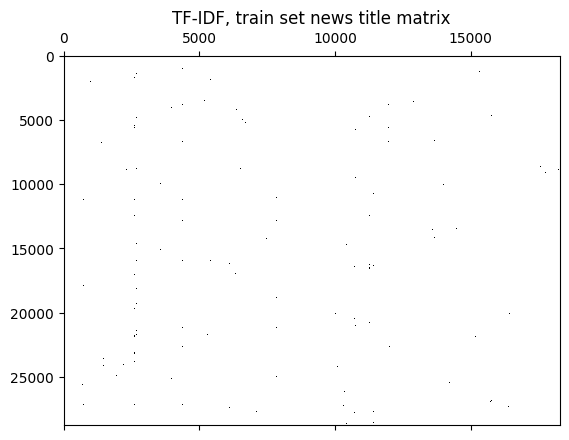

In [33]:
plt.spy(TF_IDF_title_train.toarray(), aspect = 'auto') 
plt.title("TF-IDF, train set news title matrix")
plt.show()

This tells us that our data is in fact very sparse. SOmething this sparse, if we use dense array format will take up a lot of space. As a result I will skip plotting this for the text matrix because I don't want my computer to explode. 

In [34]:
#plt.spy(TF_IDF_text_train.toarray(), aspect = 'auto') 
#plt.title("TF-IDF, train set news text matrix")
#plt.show()

### Visualize the sparse matrices in 2d

In [35]:
from sklearn.decomposition import TruncatedSVD

<Axes: xlabel='LF2', ylabel='LF1'>

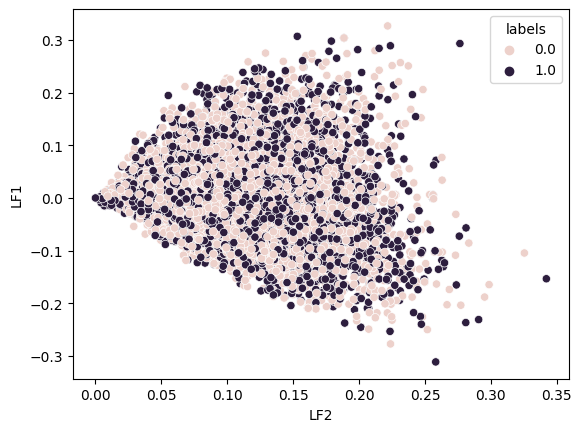

In [36]:
TF_IDF_train_title_2d = TruncatedSVD(n_components=2).fit_transform(TF_IDF_title_train)

TF_IDF_train_title_2d = pd.DataFrame(TF_IDF_train_title_2d, columns = ['LF2','LF1'])
TF_IDF_train_title_2d.insert(2, "labels", y_train, True)

sb.scatterplot(data = TF_IDF_train_title_2d, x = 'LF2', y = 'LF1', hue = 'labels')

<Axes: xlabel='LF2', ylabel='LF1'>

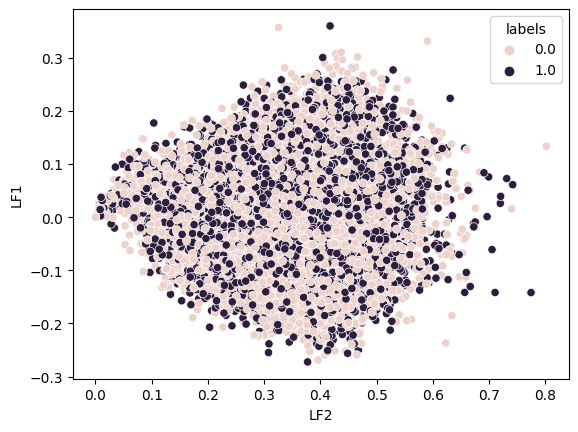

In [37]:
TF_IDF_train_text_2d = TruncatedSVD(n_components=2).fit_transform(TF_IDF_text_train)

TF_IDF_train_text_2d = pd.DataFrame(TF_IDF_train_text_2d, columns = ['LF2','LF1'])
TF_IDF_train_text_2d.insert(2, "labels", y_train, True)

sb.scatterplot(data = TF_IDF_train_text_2d, x = 'LF2', y = 'LF1', hue = 'labels')

Well this is disappointing. There is no clear decision boundaried in this visualization. But this is probably to be expected because we are reducing our very high dimensional data into 2 dimensions. 

I will not do other visualizations (e.g. t-SNE) here because this model here is not the star of the show. 

## vectorization layer for RNN

This I have already done in the disaster tweet project, so I will skip the intro. There is a tensorflow tutorial I will link to in the model fitting section corresponding to this. 

### Title

In [28]:
title_vectorizer = keras.layers.TextVectorization(max_tokens=30000,standardize="lower_and_strip_punctuation",split="whitespace",ngrams=None,output_mode="int")

title_vectorizer.adapt((x_train.title))

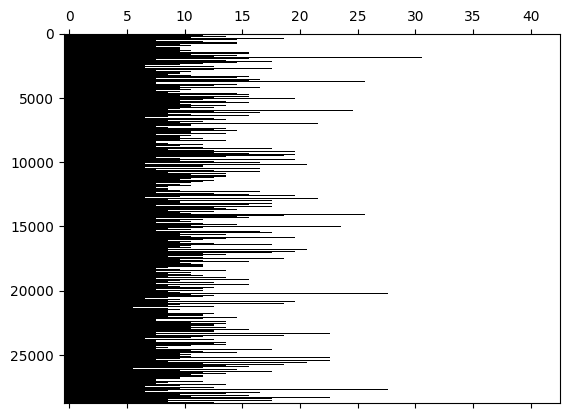

In [29]:
plt.spy(title_vectorizer(x_train.title), aspect = 'auto') 
#plt.title("TF-IDF, train set news title matrix")
plt.show()

(array([1.0300e+02, 6.5680e+03, 1.3149e+04, 5.9070e+03, 1.9100e+03,
        8.3300e+02, 1.7600e+02, 6.1000e+01, 2.1000e+01, 6.0000e+00]),
 array([ 1. ,  5.2,  9.4, 13.6, 17.8, 22. , 26.2, 30.4, 34.6, 38.8, 43. ]),
 <BarContainer object of 10 artists>)

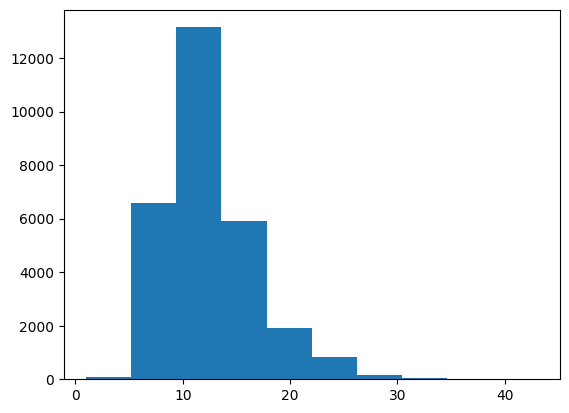

In [30]:
word_count_title = []
for row in title_vectorizer(x_train.title):
    word_count_title.append(np.count_nonzero(row))
plt.hist(word_count_title)

### text

In [31]:
text_vectorizer = keras.layers.TextVectorization(max_tokens=120000,standardize="lower_and_strip_punctuation",split="whitespace",ngrams=None,output_mode="int")

text_vectorizer.adapt((x_train.text))

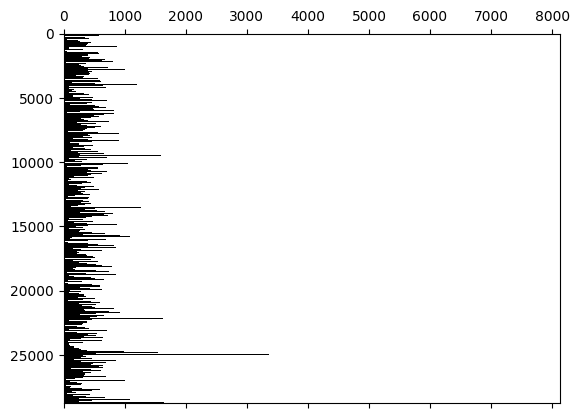

In [32]:
plt.spy(text_vectorizer(x_train.text), aspect = 'auto') 
#plt.title("TF-IDF, train set news title matrix")
plt.show()

We can see that this captured everything even from the longer articles

(array([2.6612e+04, 1.8970e+03, 1.2200e+02, 5.0000e+01, 2.7000e+01,
        7.0000e+00, 8.0000e+00, 3.0000e+00, 4.0000e+00, 4.0000e+00]),
 array([   0. ,  812.2, 1624.4, 2436.6, 3248.8, 4061. , 4873.2, 5685.4,
        6497.6, 7309.8, 8122. ]),
 <BarContainer object of 10 artists>)

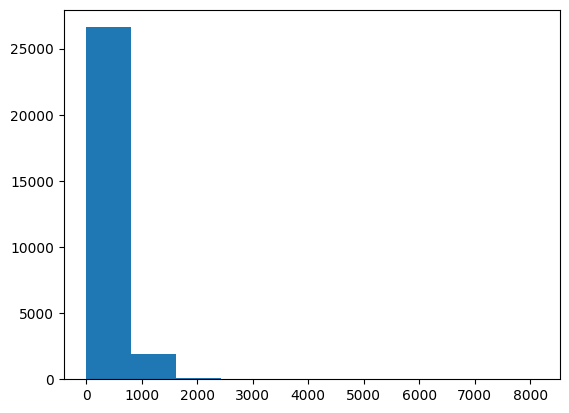

In [33]:
word_count_text = []
for row in text_vectorizer(x_train.text):
    word_count_text.append(np.count_nonzero(row))
plt.hist(word_count_text)

## tokenization for 1d CNN

I originally was thinking of using 1d CNN as a possible dimensionality reduction method for ANNs. While reasearching it I saw that it is useful for sequential data. So i did more digging and turns out that it is actually suitable for text data as well. As a result I will be fitting a CNN model with the text data. 

The specific sourses I reference will be in the corresponding model fitting section next. 

### Title

In [140]:
title_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=20000)
title_tokenizer.fit_on_texts(x_train.title)

In [141]:
def prep_text(texts, tokenizer, max_sequence_length):
    text_sequences = tokenizer.texts_to_sequences(texts)
    return tf.keras.preprocessing.sequence.pad_sequences(text_sequences, maxlen=max_sequence_length)

In [142]:
title_train_1d_cov = prep_text(x_train.title, title_tokenizer, 64)
title_test_1d_cov = prep_text(x_test.title, title_tokenizer, 64)
title_vali_1d_cov = prep_text(x_vali.title, title_tokenizer, 64)

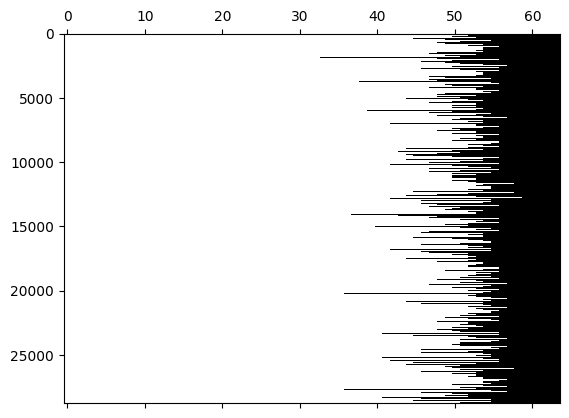

In [189]:
plt.spy(title_train_1d_cov, aspect = 'auto') 
#plt.title("TF-IDF, train set news title matrix")
plt.show()

(array([4.1000e+01, 3.1920e+03, 1.6419e+04, 6.0040e+03, 1.9400e+03,
        8.5000e+02, 1.8600e+02, 7.9000e+01, 1.6000e+01, 7.0000e+00]),
 array([ 0. ,  4.4,  8.8, 13.2, 17.6, 22. , 26.4, 30.8, 35.2, 39.6, 44. ]),
 <BarContainer object of 10 artists>)

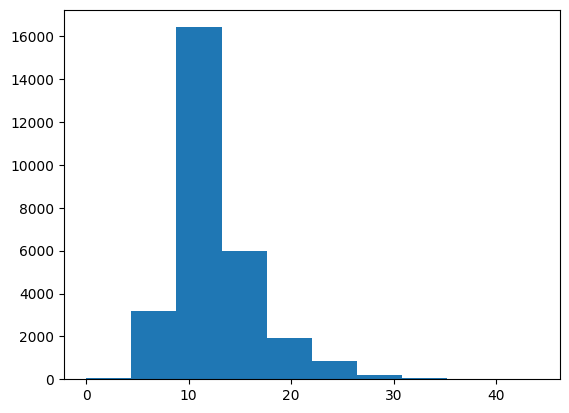

In [191]:
word_count_title_cov = []
for row in title_train_1d_cov:
    word_count_title_cov.append(np.count_nonzero(row))
plt.hist(word_count_title_cov)

We can see that the max sequence length is more than big enough for the title, this plot really looks like the histogram from earlier in RNN

### Text

In [150]:
text_tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=120000)
text_tokenizer.fit_on_texts(x_train.text)

In [160]:
text_train_1d_cov = prep_text(x_train.text, text_tokenizer, 1024)
text_test_1d_cov = prep_text(x_test.text, text_tokenizer, 1024)
text_vali_1d_cov = prep_text(x_vali.text, text_tokenizer, 1024)

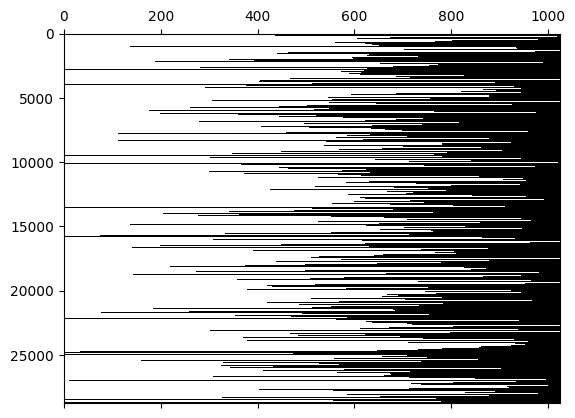

In [190]:
plt.spy(text_train_1d_cov, aspect = 'auto') 
#plt.title("TF-IDF, train set news title matrix")
plt.show()

The max sequence length here is a bit too small for some of these articles. But I will keep the max sequence length at 1024 because otherwise the number of parameters will be way too big and take way too long to train.

(array([4099., 2995., 3731., 5921., 4346., 2537., 1679., 1163.,  834.,
        1429.]),
 array([   0. ,  102.4,  204.8,  307.2,  409.6,  512. ,  614.4,  716.8,
         819.2,  921.6, 1024. ]),
 <BarContainer object of 10 artists>)

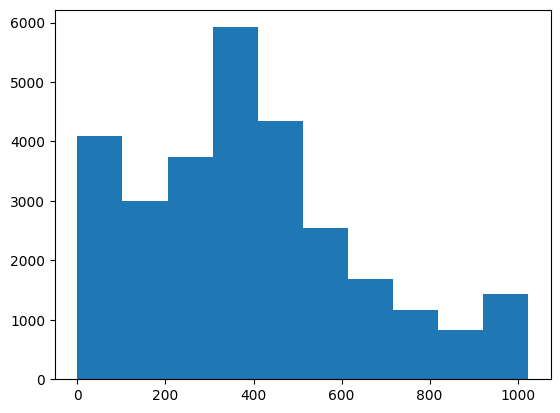

In [192]:
word_count_text_cov = []
for row in text_train_1d_cov:
    word_count_text_cov.append(np.count_nonzero(row))
plt.hist(word_count_text_cov)

We can see that we have removed some parts of the really long articles here. Compared to the vectorization procedure from earlier, this is much more restrictive as to how much we can examine. Perhaps this is a downside of this modeling and technique.

# Model Fitting

Here I fit the models corresponding to the 3 different text processing methods in the EDA section above. 

## TF-IDF vectorization with Random Forest Classifier (control)

This is the model that we will compare the other 2 deep learning models against. We know a random forest model like this works well with high dimensional data and so will work fine with the sparse matrices that TF-IDF creates. 

In [202]:
title_classifier_TFIDF_RF = RandomForestClassifier()
text_classifier_TFIDF_RF = RandomForestClassifier()

In [203]:
title_classifier_TFIDF_RF = title_classifier_TFIDF_RF.fit(TF_IDF_title_train, y_train)

In [204]:
text_classifier_TFIDF_RF = text_classifier_TFIDF_RF.fit(TF_IDF_text_train, y_train)

In [205]:
title_classifier_TFIDF_RF_vali_prediction = title_classifier_TFIDF_RF.predict(TF_IDF_title_vali)

In [206]:
text_classifier_TFIDF_RF_vali_prediction = text_classifier_TFIDF_RF.predict(TF_IDF_text_vali)

##### Accruracy score of the validation set from the title:

In [218]:
accuracy_score(y_vali, title_classifier_TFIDF_RF_vali_prediction)

0.9521158129175946

##### Accruracy score of the validation set from the text:

In [219]:
accuracy_score(y_vali, text_classifier_TFIDF_RF_vali_prediction)

0.9805122494432071

#### Summary

Those are some high numbers, this might not be easy to beat. But we can still give it a try with the various deep learning models coming up

## RNN Model with text vectorization and embedding layer (with learning rate tuning)

As with the disaster tweet project, my inspiration for this part comes from this: 

https://www.tensorflow.org/text/tutorials/text_classification_rnn

For simplicity (and since we have already done it) I will not try the other RNN model architectures. THe CNN comparison is enough. 

I will tune the learning rate of our neural network models here with the title dataset and RNN.

For the rest of these models I will use the same learning rate so we can see what each model does with the same learning rate. 

### Tuning learning rate (hyperparameter) on the titles

#### Fast learning rate ($10^{-3}$)

In [34]:
def makeDFofHist(history):
    model_record = pd.DataFrame([x for x in range(1,len(history.history['accuracy'])+1)], columns=['epoch'])
    model_record = model_record.assign(accuracy=history.history['accuracy'])
    model_record = model_record.assign(AUC=history.history['auc'])
    model_record = model_record.assign(loss=history.history['loss'])
    model_record = model_record.assign(validation_accuracy=history.history['val_accuracy'])
    model_record = model_record.assign(validation_AUC=history.history['val_auc'])
    model_record = model_record.assign(validation_loss=history.history['val_loss'])
    return model_record

In [44]:
def plot_train_and_valid(history):
    epochs = history.epoch

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(epochs, history.loss, label='training', color='green')
    plt.plot(epochs, history.validation_loss, label='validation', color='magenta')
    plt.xlabel('epochs')
    plt.title('loss by epoch')
    plt.legend()

    plt.subplot(1, 3, 2)
    plt.plot(epochs, history.accuracy, label='training', color='blue')
    plt.plot(epochs, history.validation_accuracy, label='validation', color='orange')
    plt.xlabel('epochs')
    plt.title('accuracy by epoch')
    plt.legend()

    plt.subplot(1, 3, 3)
    plt.plot(epochs, history.AUC, label='training', color='cyan')
    plt.plot(epochs, history.validation_AUC, label='validation', color='red')
    plt.xlabel('epochs')
    plt.title('AUC by epoch')
    plt.legend()

In [39]:
title_classifier_Bidirectional_LSTM_LR_tuning_e3 = keras.Sequential([
    title_vectorizer, 
    keras.layers.Embedding(len(title_vectorizer.get_vocabulary()), 64, mask_zero=True), 
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1)
])
title_classifier_Bidirectional_LSTM_LR_tuning_e3.compile(loss=keras.losses.BinaryCrossentropy(),optimizer=keras.optimizers.Adam(learning_rate = 1e-3),metrics=['accuracy', 'auc'])

title_classifier_Bidirectional_LSTM_LR_tuning_e3_history = title_classifier_Bidirectional_LSTM_LR_tuning_e3.fit(x_train.title, y_train, epochs = 40, validation_data=(x_vali.title, y_vali))

Epoch 1/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.8316 - auc: 0.8992 - loss: 0.5120 - val_accuracy: 0.9651 - val_auc: 0.9929 - val_loss: 0.1327
Epoch 2/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9759 - auc: 0.9937 - loss: 0.1201 - val_accuracy: 0.9665 - val_auc: 0.9862 - val_loss: 0.2299
Epoch 3/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9877 - auc: 0.9958 - loss: 0.0823 - val_accuracy: 0.9531 - val_auc: 0.9819 - val_loss: 0.3115
Epoch 4/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9914 - auc: 0.9961 - loss: 0.0713 - val_accuracy: 0.9710 - val_auc: 0.9820 - val_loss: 0.2984
Epoch 5/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9946 - auc: 0.9961 - loss: 0.0669 - val_accuracy: 0.9687 - val_auc: 0.9810 - val_loss: 0.3178
Epoch 6/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9951 - auc: 0.9971 - loss: 0.0520 - val_accuracy: 0.9697 - val_auc: 0.9798 - val_loss: 0.3342
Epoch 7/40
898/898 ━━━━━━━━━

In [42]:
title_classifier_Bidirectional_LSTM_LR_tuning_e3_history_df = makeDFofHist(title_classifier_Bidirectional_LSTM_LR_tuning_e3_history)

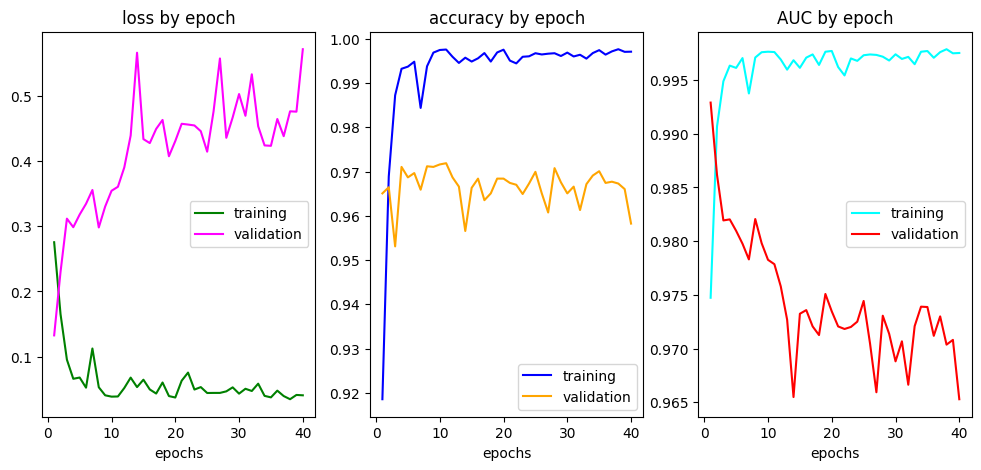

In [45]:
plot_train_and_valid(title_classifier_Bidirectional_LSTM_LR_tuning_e3_history_df)

We can see here from these plots that the learning rate is just way too fast. We can see that validation loss and AUC got worse even as validation accuracy stayed constant, suggesting that our model is overfitting immediately after epoch 1. 

#### Slow learning rate ($10^{-5}$)

In [40]:
title_classifier_Bidirectional_LSTM_LR_tuning_e5 = keras.Sequential([
    title_vectorizer, 
    keras.layers.Embedding(len(title_vectorizer.get_vocabulary()), 64, mask_zero=True), 
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1)
])
title_classifier_Bidirectional_LSTM_LR_tuning_e5.compile(loss=keras.losses.BinaryCrossentropy(),optimizer=keras.optimizers.Adam(learning_rate = 1e-5),metrics=['accuracy', 'auc'])

title_classifier_Bidirectional_LSTM_LR_tuning_e5_history = title_classifier_Bidirectional_LSTM_LR_tuning_e5.fit(x_train.title, y_train, epochs = 40, validation_data=(x_vali.title, y_vali))

Epoch 1/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 16ms/step - accuracy: 0.5235 - auc: 0.5297 - loss: 2.7325 - val_accuracy: 0.5161 - val_auc: 0.6181 - val_loss: 1.6423
Epoch 2/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 14s 16ms/step - accuracy: 0.5236 - auc: 0.5731 - loss: 1.5747 - val_accuracy: 0.5161 - val_auc: 0.6670 - val_loss: 1.4162
Epoch 3/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.5263 - auc: 0.6032 - loss: 1.3612 - val_accuracy: 0.5161 - val_auc: 0.7148 - val_loss: 1.2349
Epoch 4/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.5237 - auc: 0.6272 - loss: 1.1863 - val_accuracy: 0.5161 - val_auc: 0.7468 - val_loss: 1.0590
Epoch 5/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 16s 18ms/step - accuracy: 0.5219 - auc: 0.6504 - loss: 1.0169 - val_accuracy: 0.5161 - val_auc: 0.7530 - val_loss: 0.8891
Epoch 6/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.5247 - auc: 0.6676 - loss: 0.8475 - val_accuracy: 0.5161 - val_auc: 0.7501 - val_loss: 0.7371
Epoch 7/40
898/898 ━━━━━━━━━

In [46]:
title_classifier_Bidirectional_LSTM_LR_tuning_e5_history_df = makeDFofHist(title_classifier_Bidirectional_LSTM_LR_tuning_e5_history)

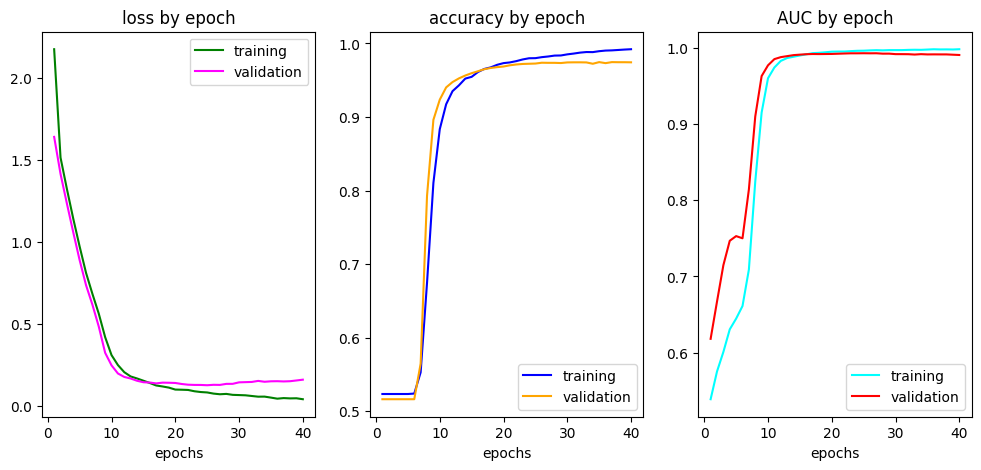

In [48]:
plot_train_and_valid(title_classifier_Bidirectional_LSTM_LR_tuning_e5_history_df)

This learning rate converges fine. We can probably select the model at around epoch 25 as the final if we were fitting the model now. 

The main problem here is that if we use this learning rate on the text data (which is much bigger) our training time would be ridiculously long because of the relatively large number if iterations. 

We can also see that the minimum validation loss we achieve here is actually not all that different from the minimum in the fast learning rate example earlier and the $10^{-4}$ learning rate example coming up. So there really is no benefit to slowing the learning rate this much. 

So let's see if we can find a good elarning rathe between these 2 extremes, probably leaning more to the slow side. 

#### $10^{-4}$ Learning rate

In [49]:
title_classifier_Bidirectional_LSTM_LR_tuning_e4 = keras.Sequential([
    title_vectorizer, 
    keras.layers.Embedding(len(title_vectorizer.get_vocabulary()), 64, mask_zero=True), 
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1)
])
title_classifier_Bidirectional_LSTM_LR_tuning_e4.compile(loss=keras.losses.BinaryCrossentropy(),optimizer=keras.optimizers.Adam(learning_rate = 1e-4),metrics=['accuracy', 'auc'])

title_classifier_Bidirectional_LSTM_LR_tuning_e4_history = title_classifier_Bidirectional_LSTM_LR_tuning_e4.fit(x_train.title, y_train, epochs = 40, validation_data=(x_vali.title, y_vali))

Epoch 1/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.5402 - auc: 0.6025 - loss: 1.4074 - val_accuracy: 0.8955 - val_auc: 0.9610 - val_loss: 0.3257
Epoch 2/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9051 - auc: 0.9704 - loss: 0.2678 - val_accuracy: 0.9609 - val_auc: 0.9897 - val_loss: 0.1663
Epoch 3/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9710 - auc: 0.9928 - loss: 0.1310 - val_accuracy: 0.9702 - val_auc: 0.9926 - val_loss: 0.1316
Epoch 4/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9828 - auc: 0.9965 - loss: 0.0790 - val_accuracy: 0.9738 - val_auc: 0.9925 - val_loss: 0.1357
Epoch 5/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9858 - auc: 0.9971 - loss: 0.0664 - val_accuracy: 0.9720 - val_auc: 0.9926 - val_loss: 0.1341
Epoch 6/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9903 - auc: 0.9977 - loss: 0.0539 - val_accuracy: 0.9729 - val_auc: 0.9913 - val_loss: 0.1575
Epoch 7/40
898/898 ━━━━━━━━━

In [50]:
title_classifier_Bidirectional_LSTM_LR_tuning_e4_history_df = makeDFofHist(title_classifier_Bidirectional_LSTM_LR_tuning_e4_history)

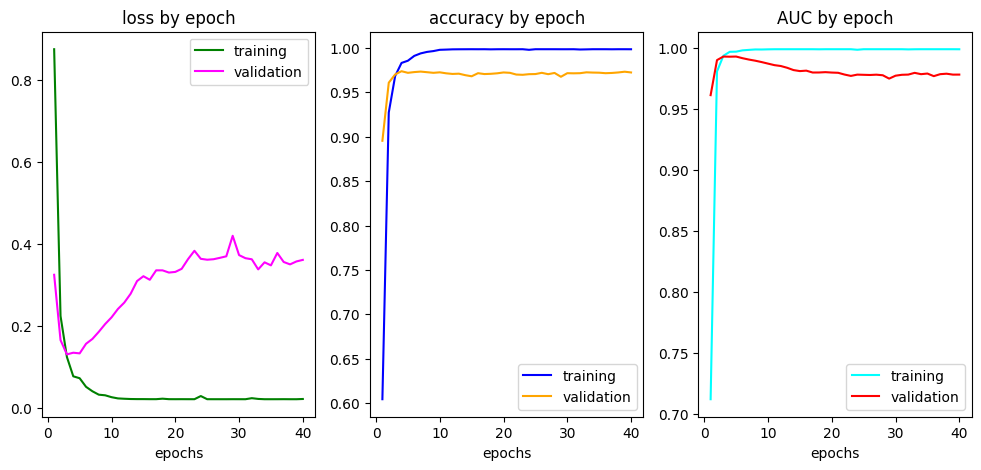

In [51]:
plot_train_and_valid(title_classifier_Bidirectional_LSTM_LR_tuning_e4_history_df)

This learning rate here is a little bit fast. It converges relatively fast, reaching minimum validation loss at iteration 3. We would like to slow this down a bit. 

That being said it does not really have worse model performance at iteration 3 than the best iteration in the slower learning rate model. So it dosen't really have a problem in that regard. 

So for our next learning rate let's go with something that is closer to $10^{-5}$ than $10^{-4}$. 

#### $3 \times 10^{-5}$ learning rate

In [54]:
title_classifier_Bidirectional_LSTM_LR_tuning_3e5 = keras.Sequential([
    title_vectorizer, 
    keras.layers.Embedding(len(title_vectorizer.get_vocabulary()), 64, mask_zero=True), 
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1)
])
title_classifier_Bidirectional_LSTM_LR_tuning_3e5.compile(loss=keras.losses.BinaryCrossentropy(),optimizer=keras.optimizers.Adam(learning_rate = 0.00003),metrics=['accuracy', 'auc'])

title_classifier_Bidirectional_LSTM_LR_tuning_3e5_history = title_classifier_Bidirectional_LSTM_LR_tuning_3e5.fit(x_train.title, y_train, epochs = 40, validation_data=(x_vali.title, y_vali))

Epoch 1/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 14s 12ms/step - accuracy: 0.5211 - auc: 0.5156 - loss: 1.9560 - val_accuracy: 0.5161 - val_auc: 0.6365 - val_loss: 0.9425
Epoch 2/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.5251 - auc: 0.5867 - loss: 0.8407 - val_accuracy: 0.5916 - val_auc: 0.8186 - val_loss: 0.5975
Epoch 3/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7083 - auc: 0.8457 - loss: 0.5189 - val_accuracy: 0.9408 - val_auc: 0.9858 - val_loss: 0.2243
Epoch 4/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9363 - auc: 0.9832 - loss: 0.2062 - val_accuracy: 0.9541 - val_auc: 0.9899 - val_loss: 0.1544
Epoch 5/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9557 - auc: 0.9893 - loss: 0.1606 - val_accuracy: 0.9599 - val_auc: 0.9919 - val_loss: 0.1362
Epoch 6/40
898/898 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9664 - auc: 0.9924 - loss: 0.1334 - val_accuracy: 0.9638 - val_auc: 0.9925 - val_loss: 0.1300
Epoch 7/40
898/898 ━━━━━━━━━

In [55]:
title_classifier_Bidirectional_LSTM_LR_tuning_3e5_history_df = makeDFofHist(title_classifier_Bidirectional_LSTM_LR_tuning_3e5_history)

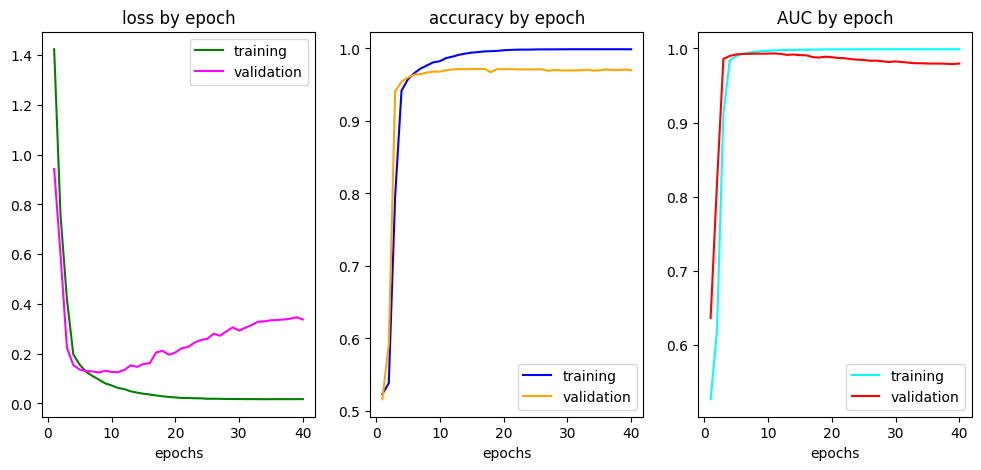

In [56]:
plot_train_and_valid(title_classifier_Bidirectional_LSTM_LR_tuning_3e5_history_df)

We can see here that this converges relatively quickly without being too quick, reaching minimum validation loss at epoch 8. 

To avoid overfitting we can set up early stopping that restores optimum weights so that the model does not overtrain. 

So lets go with this learning rate then. 

### Fitting with the titles

In [147]:

title_classifier_Bidirectional_LSTM_single = keras.Sequential([
    title_vectorizer, 
    keras.layers.Embedding(len(title_vectorizer.get_vocabulary()), 64, mask_zero=True), 
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1)
])
title_classifier_Bidirectional_LSTM_single.compile(loss=keras.losses.BinaryCrossentropy(),optimizer=keras.optimizers.Adam(learning_rate = 0.00003),metrics=['accuracy', 'auc'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3, restore_best_weights = True, start_from_epoch=0)

title_classifier_Bidirectional_LSTM_single_history = title_classifier_Bidirectional_LSTM_single.fit(x_train.title, y_train, epochs = 100, validation_data=(x_vali.title, y_vali), callbacks=[callback])

Epoch 1/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 51s 52ms/step - accuracy: 0.5251 - auc: 0.5400 - loss: 1.7633 - val_accuracy: 0.5161 - val_auc: 0.7022 - val_loss: 0.8139
Epoch 2/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.5527 - auc: 0.6721 - loss: 0.7192 - val_accuracy: 0.8264 - val_auc: 0.9250 - val_loss: 0.4705
Epoch 3/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 45s 50ms/step - accuracy: 0.8372 - auc: 0.9269 - loss: 0.3831 - val_accuracy: 0.9506 - val_auc: 0.9877 - val_loss: 0.1735
Epoch 4/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.9521 - auc: 0.9879 - loss: 0.1724 - val_accuracy: 0.9614 - val_auc: 0.9907 - val_loss: 0.1524
Epoch 5/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 44s 49ms/step - accuracy: 0.9678 - auc: 0.9929 - loss: 0.1251 - val_accuracy: 0.9659 - val_auc: 0.9917 - val_loss: 0.1429
Epoch 6/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 43s 48ms/step - accuracy: 0.9737 - auc: 0.9944 - loss: 0.1106 - val_accuracy: 0.9684 - val_auc: 0.9923 - val_loss: 0.1363
Epoch 7/100
898/898 ━━

In [41]:
#title_classifier_Bidirectional_LSTM_single_history_df = makeDFofHist(title_classifier_Bidirectional_LSTM_single_history)

In [46]:
#title_classifier_Bidirectional_LSTM_single.save_weights('RNN_title.weights.h5')

In [56]:
#title_classifier_Bidirectional_LSTM_single.load_weights('RNN_title.weights.h5')

In [66]:
#title_classifier_Bidirectional_LSTM_single_history_df.to_csv('RNN_title.csv')

### Fitting with the texts

In [37]:
text_classifier_Bidirectional_LSTM_single = keras.Sequential([
    text_vectorizer, 
    keras.layers.Embedding(len(text_vectorizer.get_vocabulary()), 64, mask_zero=True), 
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1)
])
text_classifier_Bidirectional_LSTM_single.compile(loss=keras.losses.BinaryCrossentropy(),optimizer=keras.optimizers.Adam(learning_rate = 0.00003),metrics=['accuracy', 'auc'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3, restore_best_weights = True, start_from_epoch=0)



Epoch 1/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 1029s 1s/step - accuracy: 0.5202 - auc: 0.5748 - loss: 2.3293 - val_accuracy: 0.5161 - val_auc: 0.8518 - val_loss: 1.2253
Epoch 2/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 1126s 1s/step - accuracy: 0.5238 - auc: 0.7701 - loss: 1.1083 - val_accuracy: 0.5161 - val_auc: 0.9325 - val_loss: 0.7255
Epoch 3/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 1229s 1s/step - accuracy: 0.6479 - auc: 0.8242 - loss: 0.5987 - val_accuracy: 0.9230 - val_auc: 0.9892 - val_loss: 0.3124
Epoch 4/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 1371s 2s/step - accuracy: 0.8839 - auc: 0.9555 - loss: 0.3518 - val_accuracy: 0.9656 - val_auc: 0.9971 - val_loss: 0.2642
Epoch 5/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 1489s 2s/step - accuracy: 0.9392 - auc: 0.9830 - loss: 0.2578 - val_accuracy: 0.9776 - val_auc: 0.9929 - val_loss: 0.1742
Epoch 6/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 1637s 2s/step - accuracy: 0.9442 - auc: 0.9884 - loss: 0.2237 - val_accuracy: 0.9834 - val_auc: 0.9946 - val_loss: 0.1376
Epoch 7/100
898/898 ━━

In [ ]:
text_classifier_Bidirectional_LSTM_single_history = text_classifier_Bidirectional_LSTM_single.fit(x_train.text, y_train, epochs = 100, validation_data=(x_vali.text, y_vali), callbacks=[callback])

In [178]:
text_classifier_Bidirectional_LSTM_single.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, None)           │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ (None, None, 64)       │     7,680,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,263,109 (88.74 MB)

 Trainable params: 7,754,369 (29.58 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,508,740 (59.16 MB)

In [59]:
#text_classifier_Bidirectional_LSTM_single_history_df = makeDFofHist(text_classifier_Bidirectional_LSTM_single_history)

In [51]:
#title_classifier_Bidirectional_LSTM_single.save_weights('RNN_text.weights.h5')

In [67]:
#text_classifier_Bidirectional_LSTM_single_history_df.to_csv('RNN_text.csv')

Looks like te RNN models here here had a much easier go than the disaster tweet project. Is it really that easy to tell real from fake just from the titles?

## 1D convolution CNN model with tokenization and embedding layer (Model/architecture not covered in class)

For this I am taking inspiration from these sources: 

https://learnremote.medium.com/sentiment-analysis-using-1d-convolutional-neural-networks-part-1-f8b6316489a2

https://www.tensorflow.org/responsible_ai/fairness_indicators/tutorials/Fairness_Indicators_TFCO_Wiki_Case_Study

The CNN model here uses a 1d filter that goes across our text to extract useful local features in our text as it moves. In a way this works similar to the 2d convolution we learned in class. But here our filters are only going through our data in a single dimension, and that makes the 1d CNN model suitable for examining sequential data like text. It will look at local features at each location of the text and look for signs that tells us if the title/text comes from real or fake news. 

### Fitting with the titles

In [143]:
title_1d_conv = keras.Sequential([
    keras.layers.Input(shape=(64,)),
    keras.layers.Embedding(20000, 64),
    keras.layers.Conv1D(64, 3, activation='relu', padding = "same"),
    #keras.layers.MaxPooling1D(3),
    #keras.layers.Conv1D(256, 3, activation='relu'),
    #keras.layers.MaxPooling1D(3),
    #keras.layers.Conv1D(256, 3, activation='relu'),
    #keras.layers.MaxPooling1D(3),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

The global max pooling here works similar to the flatten layer. But the original source called for a global max pool layer so I will be using that. 

In [144]:
title_1d_conv.compile(loss=keras.losses.BinaryCrossentropy(),optimizer=keras.optimizers.Adam(learning_rate = 0.00003),metrics=['accuracy', 'auc'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3, restore_best_weights = True, start_from_epoch=0)

In [145]:
title_1d_conv_history = title_1d_conv.fit(title_train_1d_cov, y_train, epochs = 100, validation_data=(title_vali_1d_cov, y_vali), callbacks=[callback])

Epoch 1/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.5543 - auc: 0.7526 - loss: 0.6799 - val_accuracy: 0.9016 - val_auc: 0.9537 - val_loss: 0.5705
Epoch 2/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8980 - auc: 0.9550 - loss: 0.5002 - val_accuracy: 0.8923 - val_auc: 0.9646 - val_loss: 0.3368
Epoch 3/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.9124 - auc: 0.9716 - loss: 0.2961 - val_accuracy: 0.9236 - val_auc: 0.9772 - val_loss: 0.2231
Epoch 4/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9364 - auc: 0.9839 - loss: 0.1954 - val_accuracy: 0.9376 - val_auc: 0.9851 - val_loss: 0.1706
Epoch 5/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9532 - auc: 0.9896 - loss: 0.1448 - val_accuracy: 0.9489 - val_auc: 0.9889 - val_loss: 0.1426
Epoch 6/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9638 - auc: 0.9927 - loss: 0.1161 - val_accuracy: 0.9553 - val_auc: 0.9909 - val_loss: 0.1256
Epoch 7/100
898/898 ━━

In [179]:
#title_1d_conv.save('CNN_title.keras')

In [180]:
title_1d_conv_history_df = makeDFofHist(title_1d_conv_history)

In [182]:
#title_1d_conv_history_df.to_csv('CNN_title.csv')

### Fitting with the texts

In [173]:
text_1d_conv = keras.Sequential([
    keras.layers.Input(shape=(1024,)),
    keras.layers.Embedding(120000, 1024),
    keras.layers.Conv1D(64, 3, activation='relu', padding = "same"),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [174]:
text_1d_conv.compile(loss=keras.losses.BinaryCrossentropy(),optimizer=keras.optimizers.Adam(learning_rate = 0.00003),metrics=['accuracy', 'auc'])

callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3, restore_best_weights = True, start_from_epoch=0)

In [175]:
text_1d_conv_history = text_1d_conv.fit(text_train_1d_cov, y_train, epochs = 100, validation_data=(text_vali_1d_cov, y_vali), callbacks=[callback])

Epoch 1/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 414s 459ms/step - accuracy: 0.7896 - auc: 0.9284 - loss: 0.5314 - val_accuracy: 0.9612 - val_auc: 0.9945 - val_loss: 0.1431
Epoch 2/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 412s 459ms/step - accuracy: 0.9735 - auc: 0.9970 - loss: 0.1077 - val_accuracy: 0.9830 - val_auc: 0.9987 - val_loss: 0.0636
Epoch 3/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 411s 458ms/step - accuracy: 0.9862 - auc: 0.9989 - loss: 0.0524 - val_accuracy: 0.9882 - val_auc: 0.9994 - val_loss: 0.0412
Epoch 4/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 411s 458ms/step - accuracy: 0.9924 - auc: 0.9997 - loss: 0.0297 - val_accuracy: 0.9911 - val_auc: 0.9996 - val_loss: 0.0305
Epoch 5/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 411s 458ms/step - accuracy: 0.9952 - auc: 0.9998 - loss: 0.0208 - val_accuracy: 0.9925 - val_auc: 0.9998 - val_loss: 0.0249
Epoch 6/100
898/898 ━━━━━━━━━━━━━━━━━━━━ 411s 458ms/step - accuracy: 0.9977 - auc: 0.9999 - loss: 0.0127 - val_accuracy: 0.9932 - val_auc: 0.9998 - val_loss: 0.0202
Epoch 7/10

In [177]:
text_1d_conv.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_34 (Embedding)        │ (None, 1024, 1024)     │   122,880,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_39 (Conv1D)              │ (None, 1024, 64)       │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_12         │ (None, 64)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 369,242,693 (1.38 GB)

 Trainable params: 123,080,897 (469.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 246,161,796 (939.03 MB)

In [176]:
#text_1d_conv.save('CNN_text.keras')

In [183]:
text_1d_conv_history_df = makeDFofHist(text_1d_conv_history)

In [184]:
#text_1d_conv_history_df.to_csv('CNN_text.csv')

# Model evaluations

I will be using the SKlearn versions of the model evaluation metrics functions. They are just infinitely easier to use and much less error prone than their counterparts in keras. 

## Collecting the model metrics

In [263]:
title_classifier_TFIDF_RF_test_prediction = title_classifier_TFIDF_RF.predict(TF_IDF_title_test)

text_classifier_TFIDF_RF_test_prediction = text_classifier_TFIDF_RF.predict(TF_IDF_text_test)

title_classifier_TFIDF_RF_test_prediction_accuracy_score = accuracy_score(y_test, title_classifier_TFIDF_RF_test_prediction)

text_classifier_TFIDF_RF_test_prediction_accuracy_score = accuracy_score(y_test, text_classifier_TFIDF_RF_test_prediction)

title_classifier_TFIDF_RF_test_prediction_score = title_classifier_TFIDF_RF.predict_proba(TF_IDF_title_test)[:, 1]

text_classifier_TFIDF_RF_test_prediction_score = text_classifier_TFIDF_RF.predict_proba(TF_IDF_text_test)[:, 1]

title_classifier_TFIDF_RF_test_prediction_f1_score = f1_score(y_test, title_classifier_TFIDF_RF_test_prediction)

text_classifier_TFIDF_RF_test_prediction_f1_score = f1_score(y_test, text_classifier_TFIDF_RF_test_prediction)

title_classifier_TFIDF_RF_test_prediction_roc_auc_score = roc_auc_score(y_test, title_classifier_TFIDF_RF_test_prediction_score)

text_classifier_TFIDF_RF_test_prediction_roc_auc_score = roc_auc_score(y_test, text_classifier_TFIDF_RF_test_prediction_score)

title_classifier_TFIDF_RF_test_prediction_cf_matrix = confusion_matrix(y_test, title_classifier_TFIDF_RF_test_prediction)

text_classifier_TFIDF_RF_test_prediction_cf_matrix = confusion_matrix(y_test, text_classifier_TFIDF_RF_test_prediction)

In [264]:
title_classifier_RNN_test_prediction_score = title_classifier_Bidirectional_LSTM_single.predict(x_test.title)

text_classifier_RNN_test_prediction_score = text_classifier_Bidirectional_LSTM_single.predict(x_test.text)

title_classifier_RNN_test_prediction_roc_auc_score = roc_auc_score(y_test, title_classifier_RNN_test_prediction_score)

text_classifier_RNN_test_prediction_roc_auc_score = roc_auc_score(y_test, text_classifier_RNN_test_prediction_score)

title_classifier_RNN_test_prediction = np.where(title_classifier_RNN_test_prediction_score > 0.5, 1, 0)

text_classifier_RNN_test_prediction = np.where(text_classifier_RNN_test_prediction_score > 0.5, 1, 0)

title_classifier_RNN_test_prediction_f1_score = f1_score(y_test, title_classifier_RNN_test_prediction)

text_classifier_RNN_test_prediction_f1_score = f1_score(y_test, text_classifier_RNN_test_prediction)

title_classifier_RNN_test_prediction_accuracy_score = accuracy_score(y_test, title_classifier_RNN_test_prediction)

text_classifier_RNN_test_prediction_accuracy_score = accuracy_score(y_test, text_classifier_RNN_test_prediction)

title_classifier_RNN_test_prediction_cf_matrix = confusion_matrix(y_test, title_classifier_RNN_test_prediction)

text_classifier_RNN_test_prediction_cf_matrix = confusion_matrix(y_test, text_classifier_RNN_test_prediction)

281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step
281/281 ━━━━━━━━━━━━━━━━━━━━ 209s 743ms/step


In [265]:
title_classifier_CNN_test_prediction_score = title_1d_conv.predict(title_test_1d_cov)

text_classifier_CNN_test_prediction_score = text_1d_conv.predict(text_test_1d_cov)

title_classifier_CNN_test_prediction_roc_auc_score = roc_auc_score(y_test, title_classifier_CNN_test_prediction_score)

text_classifier_CNN_test_prediction_roc_auc_score = roc_auc_score(y_test, text_classifier_CNN_test_prediction_score)

title_classifier_CNN_test_prediction = np.where(title_classifier_CNN_test_prediction_score > 0.5, 1, 0)

text_classifier_CNN_test_prediction = np.where(text_classifier_CNN_test_prediction_score > 0.5, 1, 0)

title_classifier_CNN_test_prediction_f1_score = f1_score(y_test, title_classifier_CNN_test_prediction)

text_classifier_CNN_test_prediction_f1_score = f1_score(y_test, text_classifier_CNN_test_prediction)

title_classifier_CNN_test_prediction_accuracy_score = accuracy_score(y_test, title_classifier_CNN_test_prediction)

text_classifier_CNN_test_prediction_accuracy_score = accuracy_score(y_test, text_classifier_CNN_test_prediction)

title_classifier_CNN_test_prediction_cf_matrix = confusion_matrix(y_test, title_classifier_CNN_test_prediction)

text_classifier_CNN_test_prediction_cf_matrix = confusion_matrix(y_test, text_classifier_CNN_test_prediction)

281/281 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
281/281 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step


## Confusion Matrices

### Random forest

In [268]:
title_classifier_TFIDF_RF_test_prediction_cf_matrix

array([[4455,  283],
       [ 169, 4073]], dtype=int64)

In [269]:
text_classifier_TFIDF_RF_test_prediction_cf_matrix

array([[4634,  104],
       [  96, 4146]], dtype=int64)

### RNN

In [270]:
title_classifier_RNN_test_prediction_cf_matrix

array([[4602,  136],
       [ 193, 4049]], dtype=int64)

In [271]:
text_classifier_RNN_test_prediction_cf_matrix

array([[4704,   34],
       [  33, 4209]], dtype=int64)

### CNN

In [273]:
title_classifier_CNN_test_prediction_cf_matrix

array([[4584,  154],
       [ 130, 4112]], dtype=int64)

In [272]:
text_classifier_CNN_test_prediction_cf_matrix

array([[4730,    8],
       [  16, 4226]], dtype=int64)

## Accuracy

### title

In [294]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]/2,round(y[i], 5), ha = 'center')

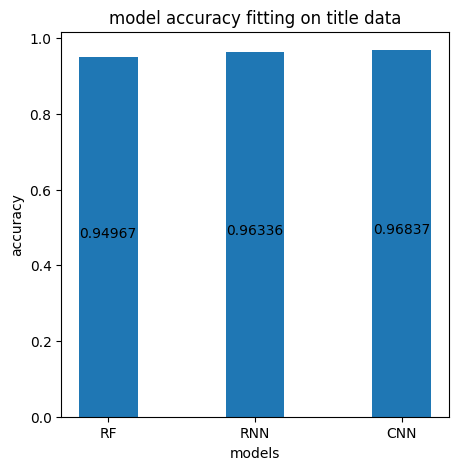

In [295]:
data = {'RF':title_classifier_TFIDF_RF_test_prediction_accuracy_score, 
        'RNN':title_classifier_RNN_test_prediction_accuracy_score, 
        'CNN':title_classifier_CNN_test_prediction_accuracy_score}
models = list(data.keys())
values = list(data.values())
 
fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(models, values, width = 0.4)

addlabels(models, values)

plt.xlabel("models")
plt.ylabel("accuracy")
plt.title("model accuracy fitting on title data")
plt.show()

### text

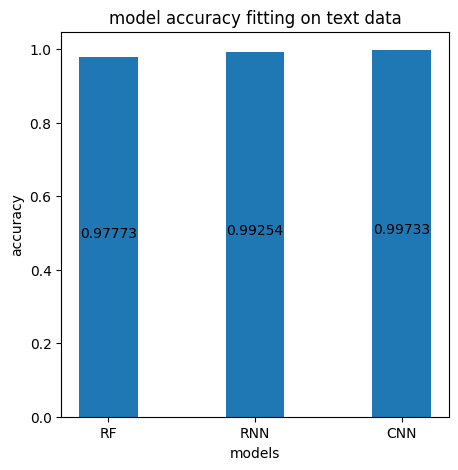

In [296]:
data = {'RF':text_classifier_TFIDF_RF_test_prediction_accuracy_score, 
        'RNN':text_classifier_RNN_test_prediction_accuracy_score, 
        'CNN':text_classifier_CNN_test_prediction_accuracy_score}
models = list(data.keys())
values = list(data.values())
 
fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(models, values, width = 0.4)

addlabels(models, values)

plt.xlabel("models")
plt.ylabel("accuracy")
plt.title("model accuracy fitting on text data")
plt.show()

## F1 score

### title

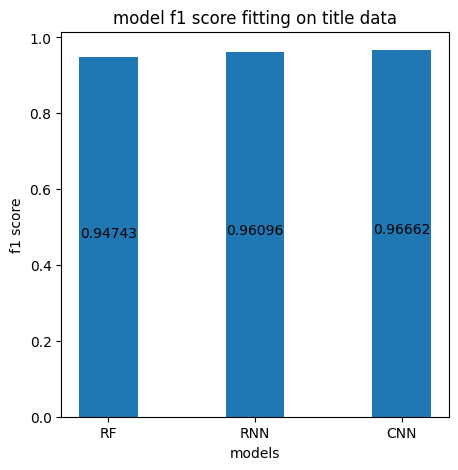

In [297]:
data = {'RF':title_classifier_TFIDF_RF_test_prediction_f1_score, 
        'RNN':title_classifier_RNN_test_prediction_f1_score, 
        'CNN':title_classifier_CNN_test_prediction_f1_score}
models = list(data.keys())
values = list(data.values())
 
fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(models, values, width = 0.4)

addlabels(models, values)

plt.xlabel("models")
plt.ylabel("f1 score")
plt.title("model f1 score fitting on title data")
plt.show()

### text

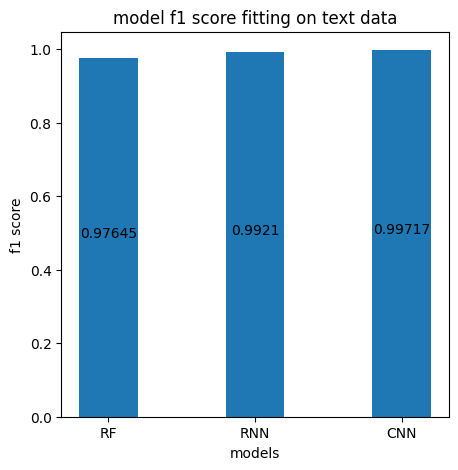

In [299]:
data = {'RF':text_classifier_TFIDF_RF_test_prediction_f1_score, 
        'RNN':text_classifier_RNN_test_prediction_f1_score, 
        'CNN':text_classifier_CNN_test_prediction_f1_score}
models = list(data.keys())
values = list(data.values())
 
fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(models, values, width = 0.4)

addlabels(models, values)

plt.xlabel("models")
plt.ylabel("f1 score")
plt.title("model f1 score fitting on text data")
plt.show()

## AUC score

### title

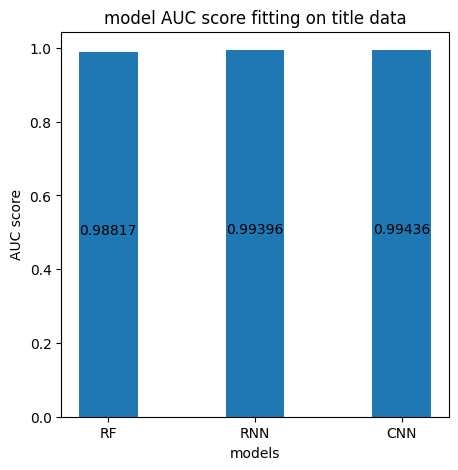

In [300]:
data = {'RF':title_classifier_TFIDF_RF_test_prediction_roc_auc_score, 
        'RNN':title_classifier_RNN_test_prediction_roc_auc_score, 
        'CNN':title_classifier_CNN_test_prediction_roc_auc_score}
models = list(data.keys())
values = list(data.values())
 
fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(models, values, width = 0.4)

addlabels(models, values)

plt.xlabel("models")
plt.ylabel("AUC score")
plt.title("model AUC score fitting on title data")
plt.show()

### text

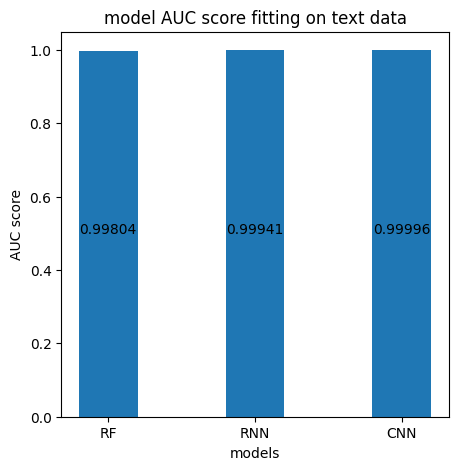

In [301]:
data = {'RF':text_classifier_TFIDF_RF_test_prediction_roc_auc_score, 
        'RNN':text_classifier_RNN_test_prediction_roc_auc_score, 
        'CNN':text_classifier_CNN_test_prediction_roc_auc_score}
models = list(data.keys())
values = list(data.values())
 
fig = plt.figure(figsize = (5, 5))

# creating the bar plot
plt.bar(models, values, width = 0.4)

addlabels(models, values)

plt.xlabel("models")
plt.ylabel("AUC score")
plt.title("model AUC score fitting on text data")
plt.show()

# Discussion and conclusion

1. It appears that the poor metrics from the tweet classification project didn't come from poor model choices and architecture in the RNN. It might have to do with the dataset being hard to separate cleanly without overfitting. The RNN model here did very well, better than the random forest model baseline in fact.

2. The RNN and CNN models suffers from the opposite problems in a way. The RNN model when fitting on the text data was extremely slow to train. But the model was not huge when saved. On the other hand the CNN model is much faster to train than the RNN, but the model was absolutely gigantic (1.40GB in fact).

3. The CNN model actually outperformed the RNN model in every metric. This suggest that our data is actually suited for local feature matching and analysis.

4. Both deep learning models outperformed the random forest classifier model on the test set. This suggest that if we are after the (albeit small) improvement in model performance we can go with a deep learning model for this problem. At the cost of much longer model training time and model complexity. 